#### 랜덤 노이즈를 이미지에 넣어서 원본으로 복원하기?

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32')/ 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

Using TensorFlow backend.


(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


#### 노이즈 생성

In [2]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0,
                                                          scale=1.0, 
                                                          size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0,
                                                       scale=1.0,
                                                       size=x_test.shape)

#### 노이즈 삽입 이미지

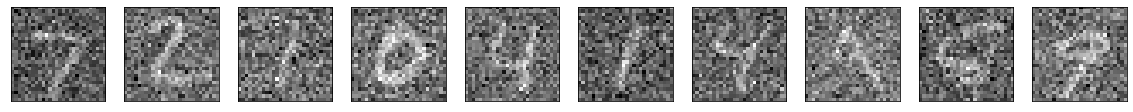

In [3]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [4]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

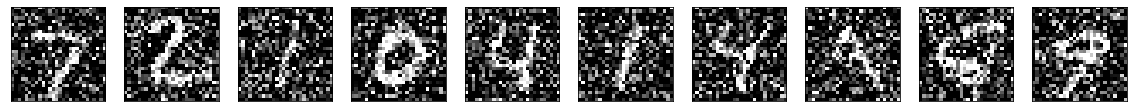

In [5]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [6]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

In [7]:
input_img = Input(shape=(28,28,1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0   

In [9]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.1752 - val_loss: 0.1197
Epoch 2/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1177 - val_loss: 0.1124
Epoch 3/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1109 - val_loss: 0.1077
Epoch 4/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1075 - val_loss: 0.1050
Epoch 5/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1053 - val_loss: 0.1049
Epoch 6/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1036 - val_loss: 0.1018
Epoch 7/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1027 - val_loss: 0.1016
Epoch 8/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1019 - val_loss: 0.1016
Epoch 9/100
60000/60000 [============================

60000/60000 [==============================] - 5s 85us/step - loss: 0.0946 - val_loss: 0.0944
Epoch 75/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.0946 - val_loss: 0.0941
Epoch 76/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.0945 - val_loss: 0.0943
Epoch 77/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.0945 - val_loss: 0.0943
Epoch 78/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.0945 - val_loss: 0.0947
Epoch 79/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.0945 - val_loss: 0.0941
Epoch 80/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.0945 - val_loss: 0.0944
Epoch 81/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.0945 - val_loss: 0.0939
Epoch 82/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.0944 - val_loss: 0.0942
Epoch 83/100
60000/60000 [========================

In [10]:
decoding_imgs = autoencoder.predict(x_test_noisy)

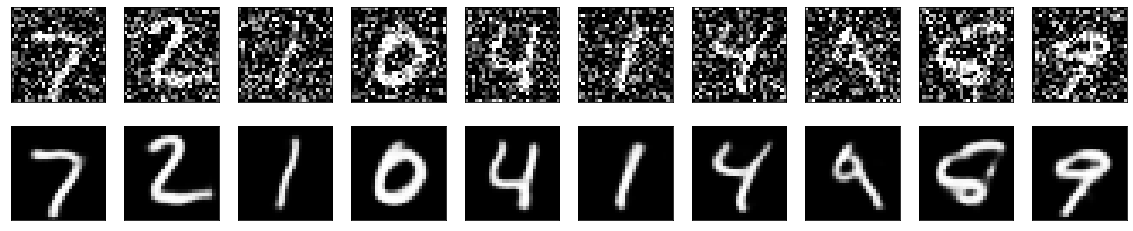

In [11]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoding_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
    